# K-means implementation in  python 


We first import two useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. use tab and shift+tab for help

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line plots graphs in line
%matplotlib inline

### First we generate a  dataset (synthetic)

In [3]:
# C_g is the array for centroids
# 
M_g = 3
np.random.seed(3)
C_g = np.random.rand(M_g,2)*.6+0.2
print C_g

[[ 0.53047874  0.62488869]
 [ 0.37454284  0.50649656]
 [ 0.73576817  0.73777585]]


In [4]:
# we can also fix the centroids on a diagonal
C_g=np.array([[.25,.25],
             [.5,.5],
             [.75,.75]])

In [5]:
# we can also choose the centroids arbitarily
C_g=np.array([[.25,.25],
             [.75,.5],
             [.45,.75]])

In [15]:
# Generate data set ( M=3, centroid, constant sigma)
sigma=0.085
number=10
X1=sigma*np.random.randn(number,2)+C_g[0]
X2=sigma*np.random.randn(number,2)+C_g[1]
X3=sigma*np.random.randn(number,2)+C_g[2]
#
# storing the centroid index (note this may not correspond to teh same number from the k-means algorithm)
X11=np.concatenate((sigma*np.random.randn(number,2)+C_g[0],np.full((number,1),0.0)),axis=1)
X22=np.concatenate((sigma*np.random.randn(number,2)+C_g[1],np.full((number,1),1.0)),axis=1)
X33=np.concatenate((sigma*np.random.randn(number,2)+C_g[2],np.full((number,1),2.0)),axis=1)
#
#X=np.concatenate((X1,X2,X3), axis=0)
X=np.concatenate((X11,X22,X33), axis=0)
#np.random.shuffle(X)
#print X

#### You can improve the above code snippet to generate any arbitrary number (M) of  clusters

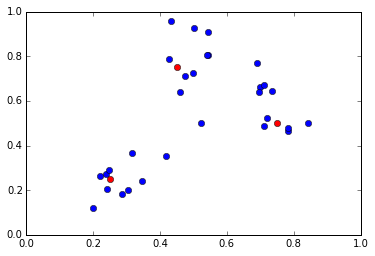

In [16]:
# plot data set and centroids
plt.figure()
plt.plot(X[:,0],X[:,1],'o')
plt.plot(C_g[:,0],C_g[:,1],'ro')
plt.axis([0, 1.0, 0, 1.0])
plt.show()

#### You can improve the above code snippet to colour/shape code the clusters

## K-means starts here

In [17]:
# Initialise array for centroids
# C is the array for centroids
#
# compute range of values for centroids
min_x0=np.min(X[:,0])
max_x0=np.max(X[:,0])
#print "x0_range = (%5.4f, %5.4f)" %(min_x0, max_x0)
min_x1=np.min(X[:,1])
max_x1=np.max(X[:,1])
#print "x1_range = (%5.4f, %5.4f)" %(min_x1, max_x1)
a = min(min_x0,min_x1)
b = max(max_x0,max_x1)
print "x_range = (%5.4f, %5.4f)" %(a,b)
#
M = 3
C = np.random.rand(M,2)*(b-a)+a
#
print "Initial Centroids : "
print C

x_range = (0.1185, 0.9589)
Initial Centroids : 
[[ 0.58692766  0.84843455]
 [ 0.49839171  0.56811066]
 [ 0.69919562  0.19375007]]


In [18]:
# Define a function that allocates points to the nearest centroid
# input arguments are vector XX, representing features for one point and Centroid values
# function returns index closest centroid
def get_centroid_index(xx,C_val):
    #
    return_arg = -1
    #
    if len(xx.shape)>1 or xx.shape[0]!=(C_val.shape)[1]:
        print "---error in input arguments ---"
    #
    distance=np.zeros(C_val.shape[0])
    for i in range(C_val.shape[0]):
        distance[i]=(np.sqrt(np.sum((xx-C_val[i,:])**2)))
    #print distance
    return_arg = np.argmin(distance)
    return return_arg
    

In [19]:
# make a copy of the dataset
XX = np.copy(X)
C_index=np.zeros(len(XX[:,0]),dtype=int)
C_iter=np.array(C)
#
converge=[]
for iter in range(10):
    C_prev=np.array(C_iter)
    # Allocate data points to centroids 
    for i in range(len(C_index)):
        C_index[i] = get_centroid_index(XX[i,0:2],C_iter)
    #
    # Recalculate centroids
    #
    for m in range(M):
        x_total=[[],[]]
        for i in range(len(C_index)):
            if C_index[i]==m:
                x_total[0].append(XX[i,0])
                x_total[1].append(XX[i,1])
        #print "centroid=%d:%d"%(m,len(x_total[0]))
        #print "centroid=%d:%d"%(m,len(x_total[1]))

        if len(x_total[0])>0 and len(x_total[1])>0:
            C_iter[m,0] = np.mean(x_total[0])
            C_iter[m,1] = np.mean(x_total[1])
    #
    converge.append(np.sum((C_prev-C_iter)**2.0))
print C_index

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [12]:
# to compare labels and calculate error we need to manually match the centroids 
for i in range(len(C_index)):
    if C_index[i]==2:
        C_index[i]=0
    elif C_index[i]==0:
        C_index[i]=1
    elif C_index[i]==1:
        C_index[i]=2

print C_index



[1 1 2 1 1 1 1 1 1 1 0 0 1 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 1]


#### improve above code snippet with Python dictionaries

In [20]:
# an attempt to compute error. 
# What is wrong with teh below line? 
print np.sum((XX[:,2] - np.asarray(C_index, dtype=float))**2)

80.0


[0.068666443493376098, 0.041230078338395627, 0.027162547523272532, 0.0023276191400260935, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


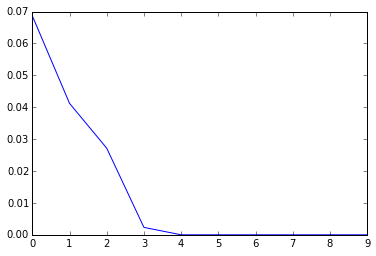

In [21]:
print converge
plt.figure()
plt.plot(converge)
plt.show()

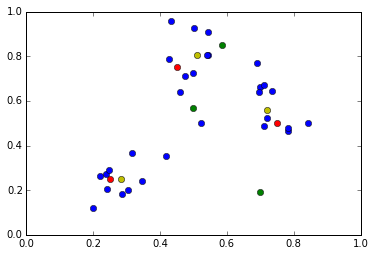

In [22]:
# plot data set and centroids
plt.figure()
plt.plot(X[:,0],X[:,1],'o')
plt.plot(C_g[:,0],C_g[:,1],'ro')
plt.plot(C[:,0],C[:,1],'go')
plt.plot(C_iter[:,0],C_iter[:,1],'yo')

plt.axis([0, 1.0, 0, 1.0])
plt.show()